# Proyecto
Consiste en crear modelos predictivos de regresión lineal uni-variable de la forma:

y = β0 + β1 ∗ x

Donde:

- y es la variable dependiente,
- x es la variable independiente,
- β0 es el intercepto de la recta,
- β1 es la pendiente de la recta.

In [1]:
# IMPORTACION DE LIBRERIAS 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model

In [2]:
# IMPORTACION DEL ARCHIVO
directorio =r"./data/proyecto_training_data.npy"
datos = np.load(directorio)

# CREAR DATA SET
dataSet = pd.DataFrame(datos)

#COLOCAR ENCABEZADOS PARA EL DATASET
nombre_col = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
dataSet.columns = nombre_col

In [44]:
#VISTA PREVIA DEL DATASET
dataSet.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [69]:
dataSet.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [8]:
# CONTAR CANTIDAD DE FILAS Y COLUMNAS DEL DATASET
dataSet.shape

(1460, 6)

In [9]:
#Identificar cantidad de registros
num_filas = len(dataSet)

#80% del dataset(filas) se usara para todo el proceso de entrenamiento
num_filas_setEntrena= int(num_filas*0.8)


In [10]:
# CREAR SET DE ENTRANMIENTO
setEntrena=dataSet.iloc[0:num_filas_setEntrena,:]

# CONTAR FILAS DEL SET DE ENTRANMIENTO
setEntrena.shape

(1168, 6)

In [11]:
#CREAR SET DE VALIDACION
setValidacion=dataSet.iloc[num_filas_setEntrena:,:]

#CONTAR FILAS DEL SET DE VALIDACION
setValidacion.shape

(292, 6)

In [12]:
# VALIDAR QUE LOS SETS ESTEN COMPLETOS
len(setEntrena) + len(setValidacion) == num_filas

True

--------------------------------------
Columna: SalePrice
--------------------------------------
Media:  180921.19589041095
Maximo:  755000.0
Minimo:  34900.0
Desviacion Standar: 79442.50288288663
Rango peak to peak: 720100.0
Valores Nulos:  0



C:\Users\XPRS\AppData\Local\Temp\ipykernel_16308\3392892565.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataSet[col])


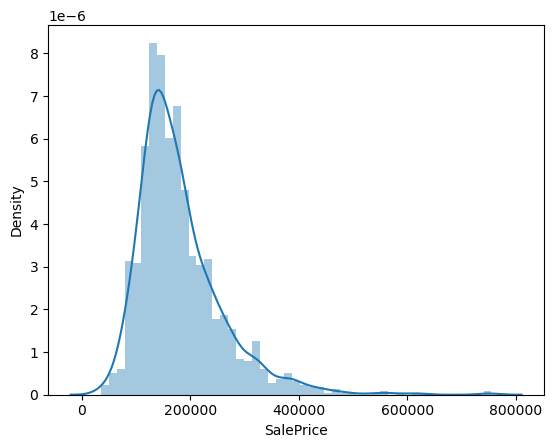


--------------------------------------
Columna: OverallQual
--------------------------------------
Media:  6.0993150684931505
Maximo:  10.0
Minimo:  1.0
Desviacion Standar: 1.3829965467415923
Rango peak to peak: 9.0
Valores Nulos:  0



C:\Users\XPRS\AppData\Local\Temp\ipykernel_16308\3392892565.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataSet[col])


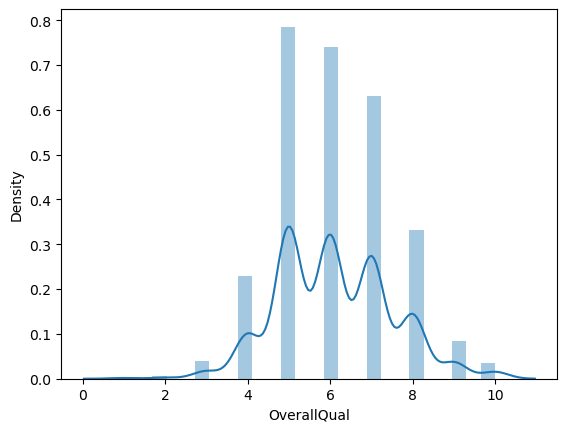


--------------------------------------
Columna: 1stFlrSF
--------------------------------------
Media:  1162.626712328767
Maximo:  4692.0
Minimo:  334.0
Desviacion Standar: 386.5877380410738
Rango peak to peak: 4358.0
Valores Nulos:  0



C:\Users\XPRS\AppData\Local\Temp\ipykernel_16308\3392892565.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataSet[col])


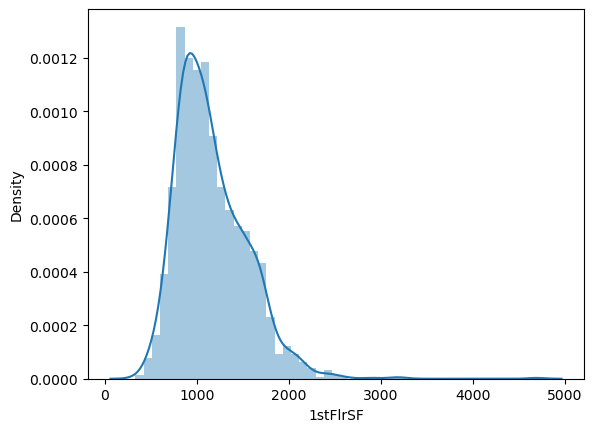

C:\Users\XPRS\AppData\Local\Temp\ipykernel_16308\3392892565.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataSet[col])



--------------------------------------
Columna: TotRmsAbvGrd
--------------------------------------
Media:  6.517808219178082
Maximo:  14.0
Minimo:  2.0
Desviacion Standar: 1.625393290584064
Rango peak to peak: 12.0
Valores Nulos:  0



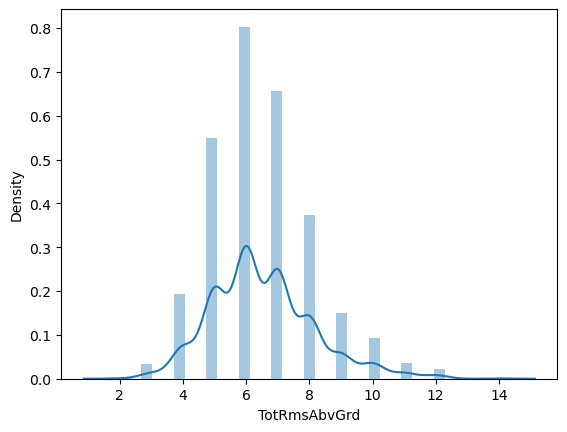


--------------------------------------
Columna: YearBuilt
--------------------------------------
Media:  1971.267808219178
Maximo:  2010.0
Minimo:  1872.0
Desviacion Standar: 30.202904042525265
Rango peak to peak: 138.0
Valores Nulos:  0



C:\Users\XPRS\AppData\Local\Temp\ipykernel_16308\3392892565.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataSet[col])


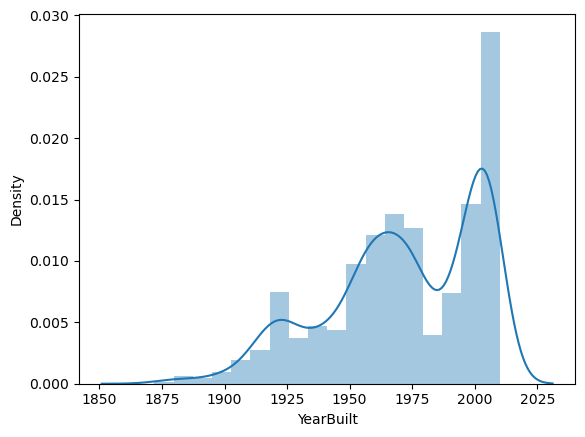


--------------------------------------
Columna: LotFrontage
--------------------------------------
Media:  70.04995836802665
Maximo:  313.0
Minimo:  21.0
Desviacion Standar: 24.284751774483183
Rango peak to peak: nan
Valores Nulos:  259



C:\Users\XPRS\AppData\Local\Temp\ipykernel_16308\3392892565.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataSet[col])


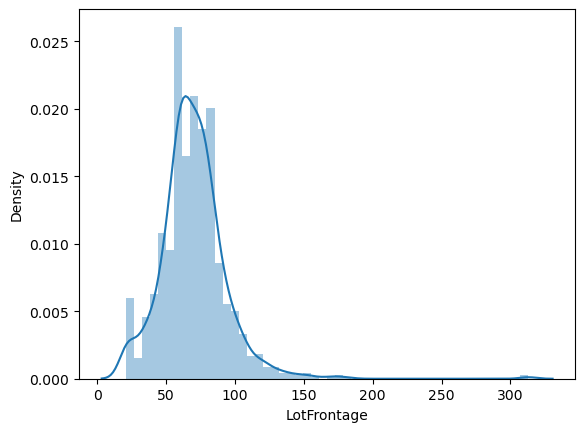

In [41]:
#ANALISIS EXPLORATORIO DE LOS DATOS 

for col in dataSet.columns:
    dtExploratorios = dataSet[col].describe()
    print("--------------------------------------")
    print(f"Columna: {col}")
    print("--------------------------------------")
    #print(dtExploratorios)
    print("Media: ",dtExploratorios["mean"])
    print("Maximo: ",dtExploratorios["max"])
    print("Minimo: ",dtExploratorios["min"])
    print("Desviacion Standar:",dtExploratorios["std"])
    print("Rango peak to peak:",np.ptp(dataSet[col]))
    print("Valores Nulos: ", dataSet[col].isnull().sum())
    print()
    
    #GRAFICAR HISTOGRAMA
    sns.distplot(dataSet[col])
    plt.show()
    
    print()

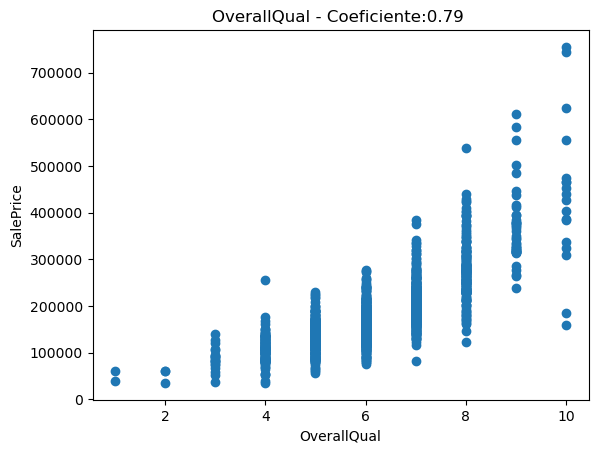

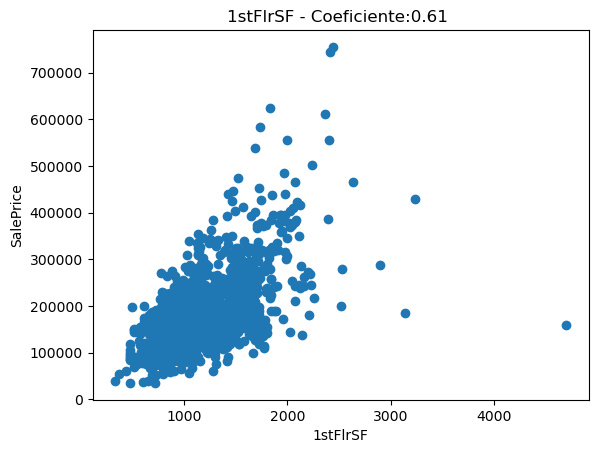

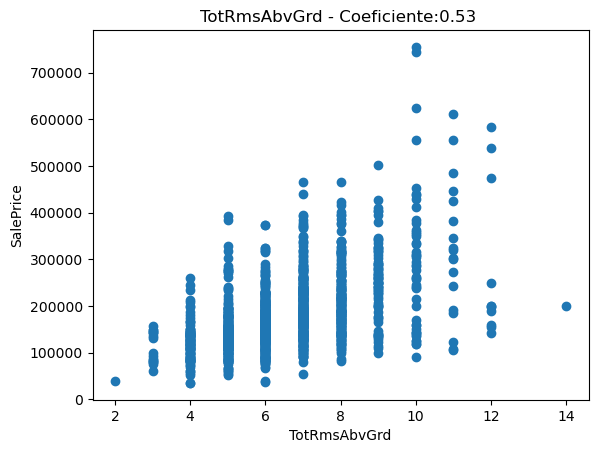

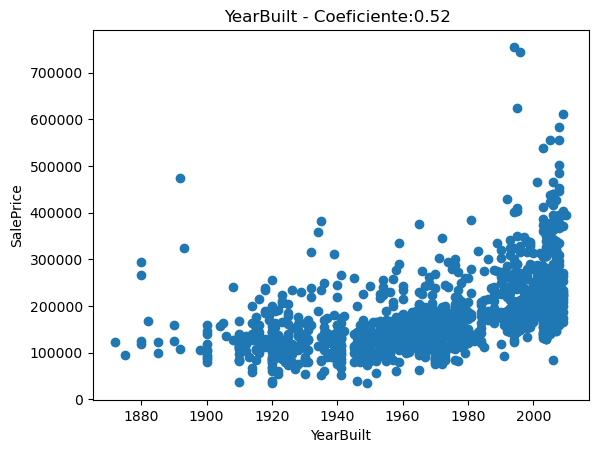

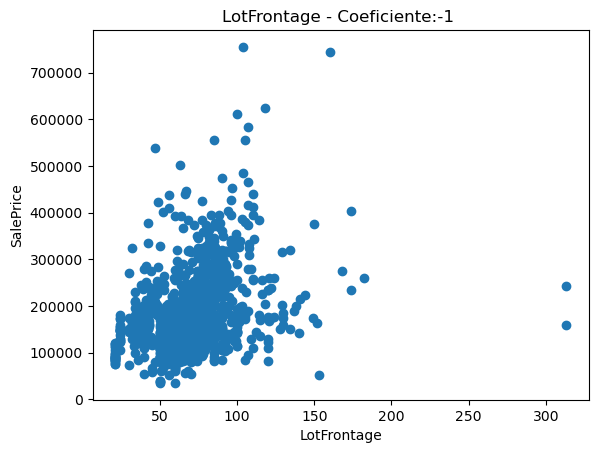

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage,y_,x_,xy
0,208500.0,7.0,856.0,8.0,2003.0,65.0,27578.80411,-5.049958,-139271.812593
1,181500.0,6.0,1262.0,6.0,1976.0,80.0,578.80411,9.950042,5759.124987
2,223500.0,7.0,920.0,6.0,2001.0,68.0,42578.80411,-2.049958,-87284.775785
3,140000.0,7.0,961.0,7.0,1915.0,60.0,-40921.19589,-10.049958,411256.315068
4,250000.0,8.0,1145.0,9.0,2000.0,84.0,69078.80411,13.950042,963652.193216


In [3]:
#FUNCION PARA OBTENER DATOS NECESARIOS PARA CALCULAR CORRELACION
def estadisticos_col(df,col):
    estds=df[col].describe()
    media = estds["mean"]
    std=estds["std"]        
    conteo =estds["count"]
    
    return media, std, conteo



# GRAFICAR X y Y con scatterPlot
var_y='SalePrice'

mediaY, stdY, conteoY=estadisticos_col(dataSet,var_y)
dataSet["y_"]=dataSet[var_y]-mediaY


# CALCULAR COEFICIENTE PARA COLUMNA 
for col in dataSet:
    if col not in( var_y, "y_","x_","xy") :
        #print(col)
        mediaX, stdX, conteoX=estadisticos_col(dataSet,col)
        dataSet["x_"]=dataSet[col]-mediaX
        dataSet["xy"]=dataSet["x_"]* dataSet["y_"]
        
        sumaXY=dataSet["xy"].sum()
        coeficiente=-1
        if (conteoY>0 ) and (conteoX==conteoY):
            coeficiente = sumaXY/( (conteoX-1) * stdX* stdY )
            
        #print("coeficiente ", coeficiente)
        
        plt.scatter(dataSet[col], dataSet[var_y] )
        plt.xlabel(col)
        plt.ylabel(var_y)
        plt.title(f"{col} - Coeficiente:{round(coeficiente,2)  } ") 
        plt.show()
        

dataSet.head()